# Package Lab

## Import

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import Package_LAB
from Package_LAB import *
import package_DBR
from package_DBR import *
from importlib import reload
package_DBR= reload(package_DBR)
Package_LAB=reload(Package_LAB)
from Package_LAB import *

## Test of lead lag function

(0.0, 100.0)

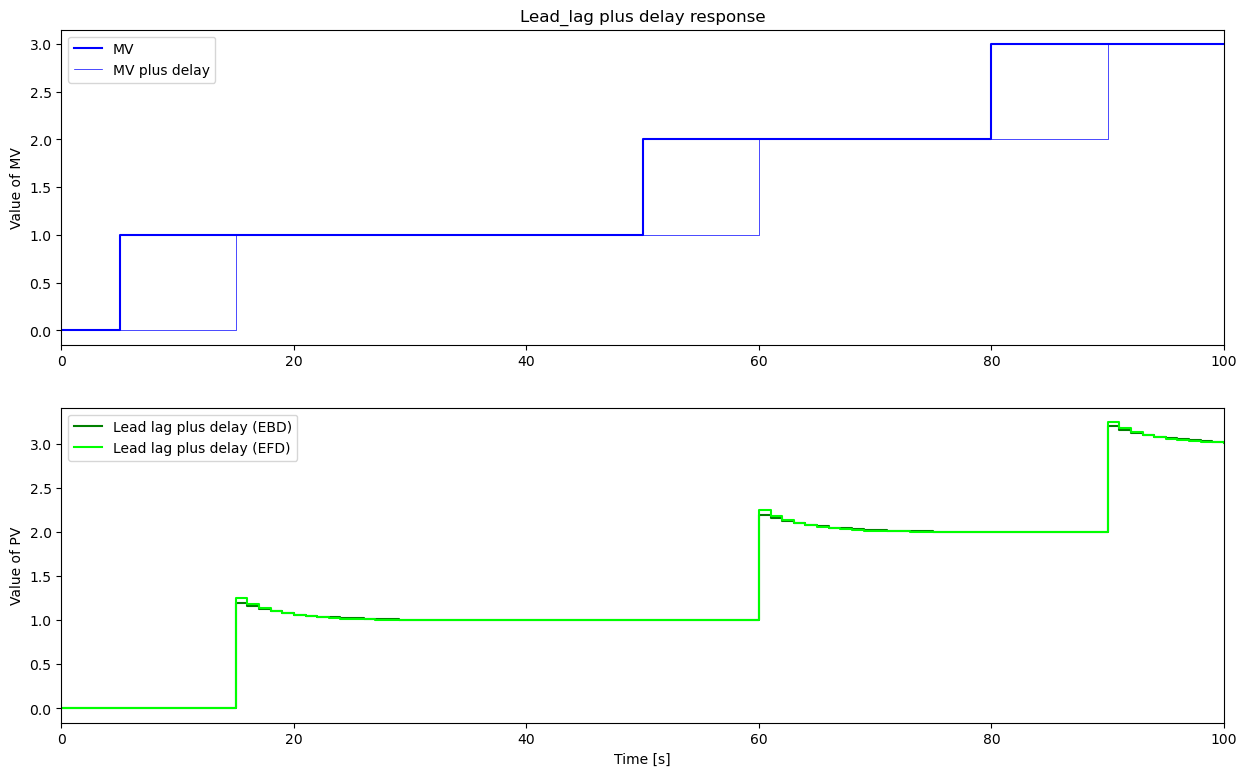

In [204]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlag = 4
Tlead = 5
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    Lead_lag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EBD)
    Lead_lag_RT(MVDelay,Kp,Tlag,Tlead,Ts,PV_EFD,0,'EFD')
    #Lead_lag_RT(MVDelay,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Lead_lag plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='Lead lag plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='Lead lag plus delay (EFD)',where='post')
#plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

## Test of PID function

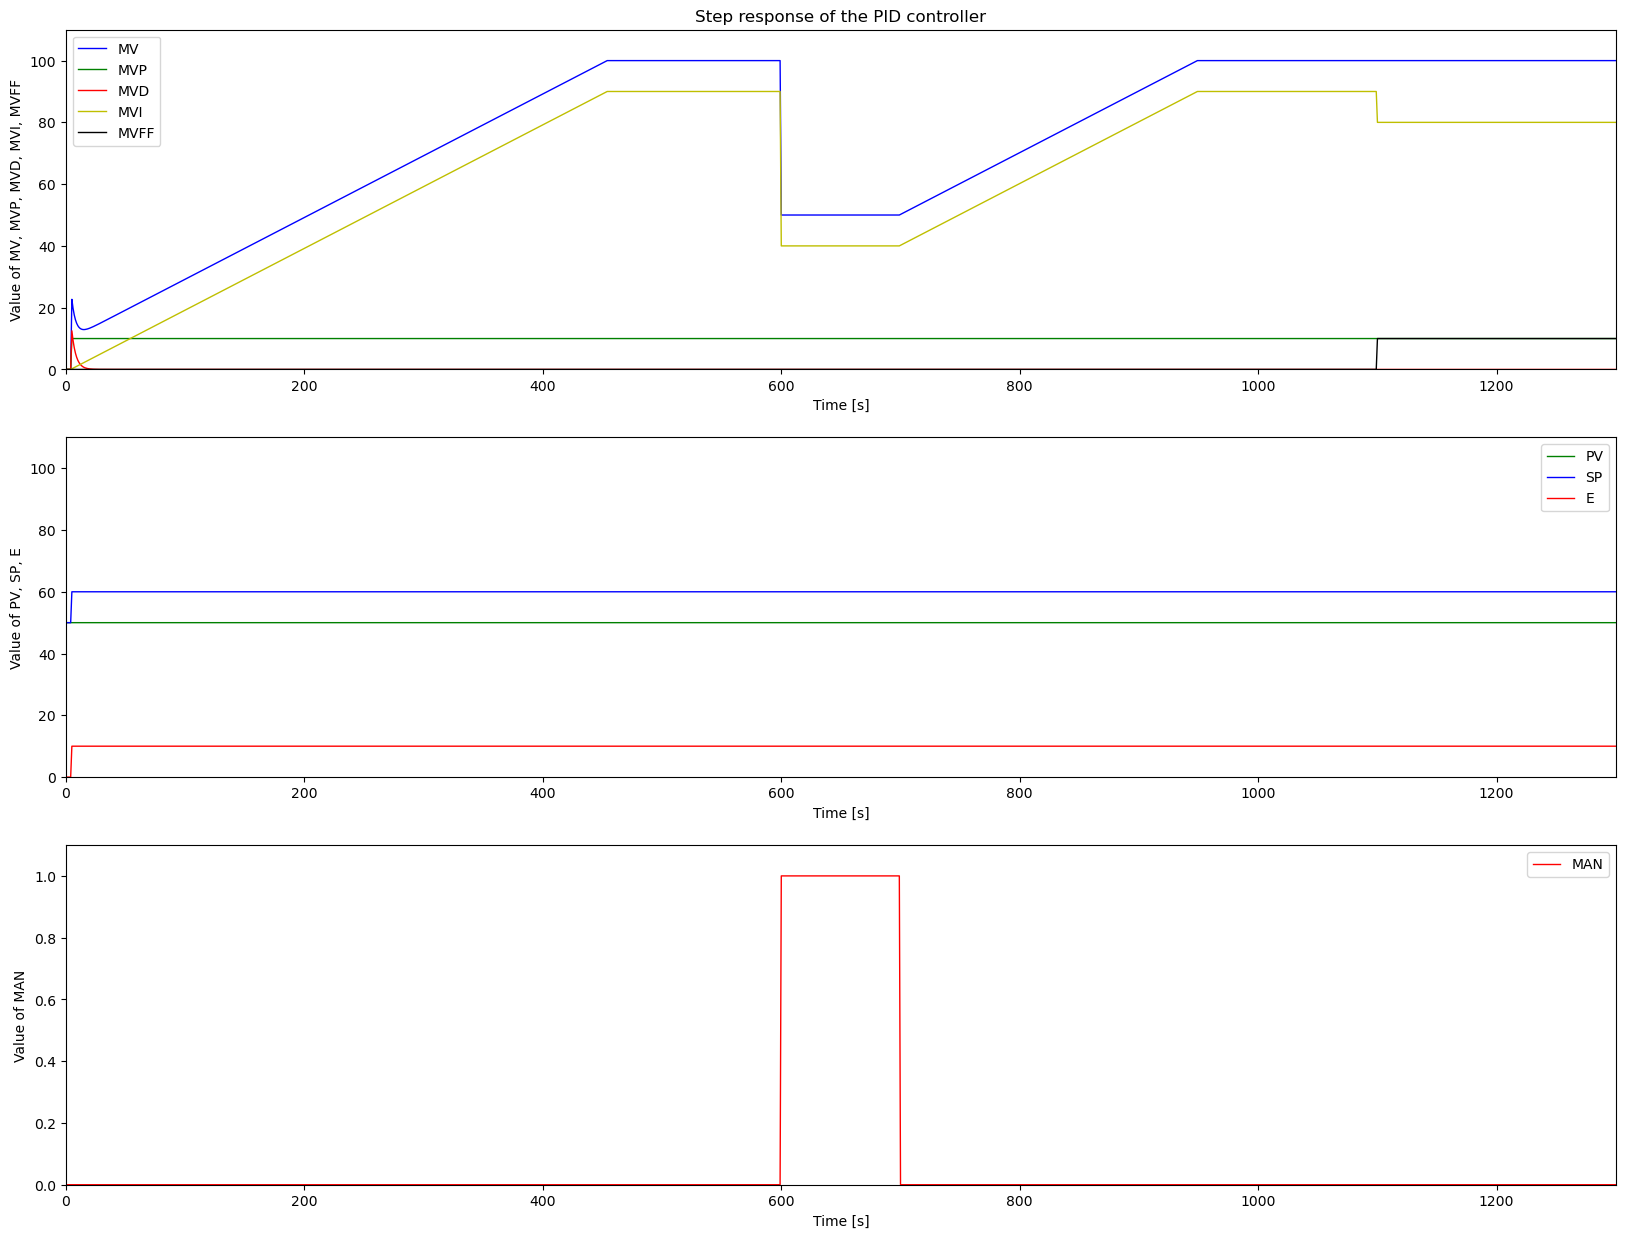

In [205]:
TSim = 1300
Ts = 1
N = int(TSim/Ts) + 1

MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}


ManPath = {0: False, 600: True, 700:False, TSim : False}
MVFFPath = {0:0, 1100: 10, TSim : 10}

Kc = 1
Ti = 50
Td = 5
alpha = 0.6
MVmin = 0 
MVmax = 100


t = []
MV = []
SP = []
PV = []
MVman = []
MVff = []
Man= []
MVP = []
MVD = []
MVI = []
E = []
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.set_figheight(15)
fig.set_figwidth(20)

l1, = ax1.plot([],[],'b-', linewidth=1, label='MV')
l2, = ax1.plot([],[],'g-', linewidth=1, label='MVP')
l3, = ax1.plot([],[],'r-', linewidth=1, label='MVD')
l4, = ax1.plot([],[],'y-', linewidth=1, label='MVI')
l5, = ax1.plot([],[],'k-', linewidth=1, label='MVFF')
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Value of MV, MVP, MVD, MVI, MVFF')
ax1.set_title('Step response of the PID controller')
ax1.legend(loc='best')
ax1.set_xlim([0, TSim])
ax1.set_ylim([0, 110])

l6, = ax2.plot([],[],'g-', linewidth=1, label='PV')
l7, = ax2.plot([],[],'b-', linewidth=1, label='SP')
l8, = ax2.plot([],[],'r-', linewidth=1, label='E')
ax2.set_xlabel('Time [s]')
ax2.set_ylabel('Value of PV, SP, E')
ax2.legend(loc='best')
ax2.set_xlim([0, TSim])
ax2.set_ylim([0, 110])

l9, = ax3.plot([],[],'r-', linewidth=1, label='MAN')
ax3.set_xlabel('Time [s]')
ax3.set_ylabel('Value of MAN')
ax3.legend(loc='best')
ax3.set_xlim([0, TSim])
ax3.set_ylim([0, 1.1])
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    SelectPath_RT(ManPath,t,Man)
    SelectPath_RT(MVManPath,t,MVman)
    SelectPath_RT(MVFFPath,t,MVff)
    PID_RT(SP,PV,Man,MVman,MVff,Kc,Ti,Td,alpha,Ts, MVmin,MVmax,MV,MVP,MVI,MVD,E,False,0,'EBD_EBD')
l1.set_data(t,MV)
l2.set_data(t,MVP)
l3.set_data(t,MVD)
l4.set_data(t,MVI)
l5.set_data(t,MVff)
l6.set_data(t,PV)
l7.set_data(t,SP)
l8.set_data(t,E)
l9.set_data(t,Man)


